In [25]:
import constants
cache_folder_name = 'ratio=logreg;loss=squared;method=baseline'
seed = 44

In [26]:
import autograd.numpy as np
np.random.seed(seed)
import python_utils.python_utils.basic as basic
import python_utils.python_utils.caching as caching
log_folder = '%s/%s' % (constants.cache_folder, cache_folder_name)
caching.init(constants.cache_folder, constants.which_hash, basic.archiver(log_folder))
%load_ext autoreload
%autoreload 2
import matplotlib
matplotlib.use('Agg')

[Errno 17] File exists: '/Users/fultonw/Documents/projects/runs/domain_adapt_run/domain_adapt_run/notebooks/new/hyperparameter_loss_surface_stratified/boston_housing/cache/ratio=logreg;loss=squared;method=baseline'
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import matplotlib.pyplot as plt
from IPython.display import display_pretty, display_html
import python_utils.python_utils.basic as basic
import pandas as pd
import pdb
import itertools
import functools
import scipy.stats
import scipy
import cvxopt
import autograd
import autograd.numpy as np
import domain_adapt.domain_adapt.new.fxns as fxns
import domain_adapt.domain_adapt.new.utils as utils
import domain_adapt.domain_adapt.new.optimizers as optimizers
import domain_adapt.domain_adapt.new.constructors as constructors
#import domain_adapt.domain_adapt.SDR_data as data
import domain_adapt_run.domain_adapt_run.notebooks.new.hyperparameter_loss_surface_stratified.run as run
import data.domain_adapt_data.domain_adapt_data.fxns as data

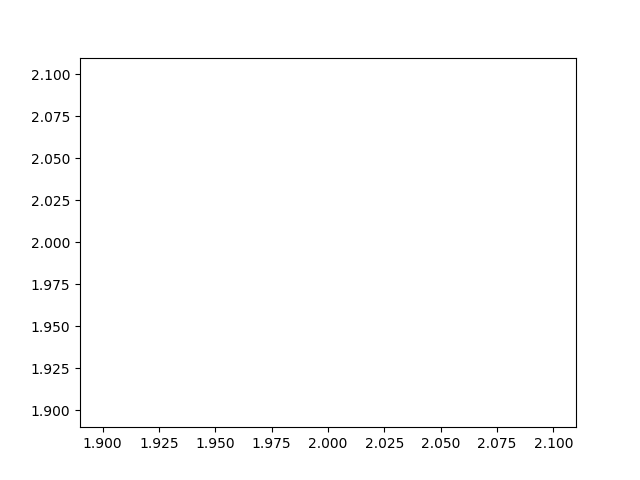

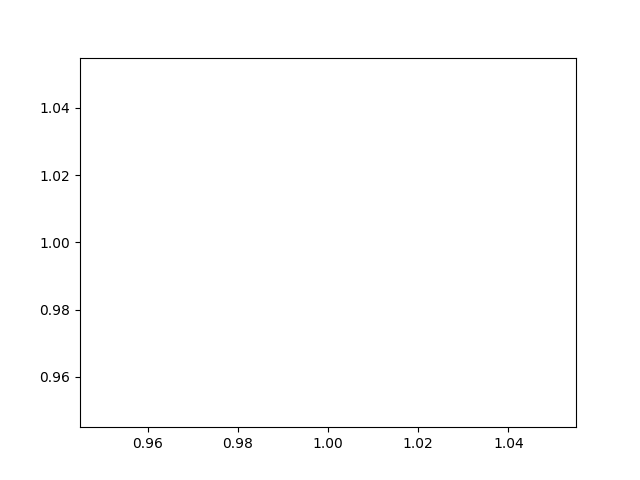

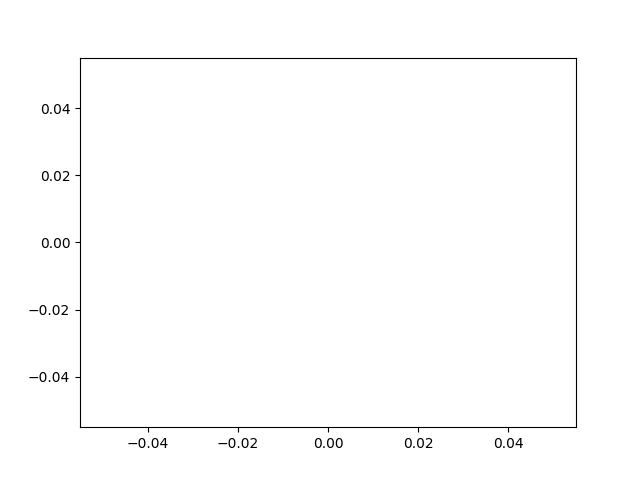

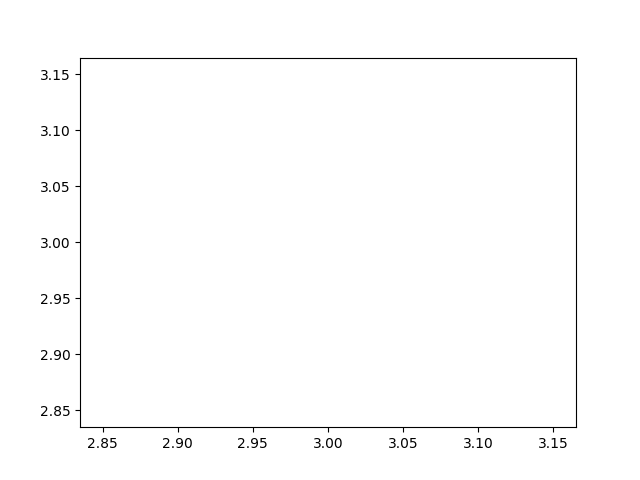

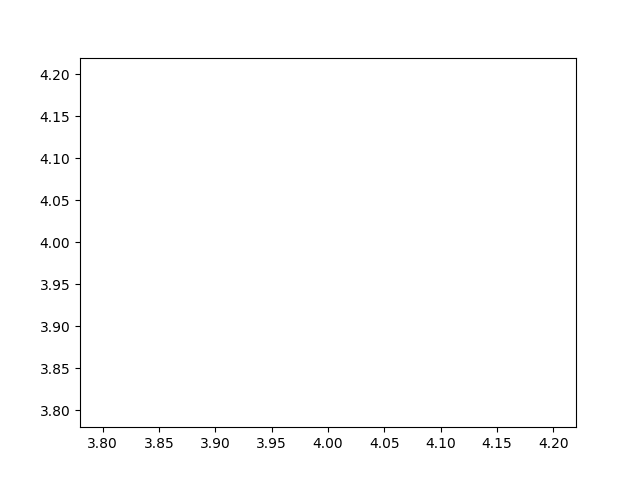

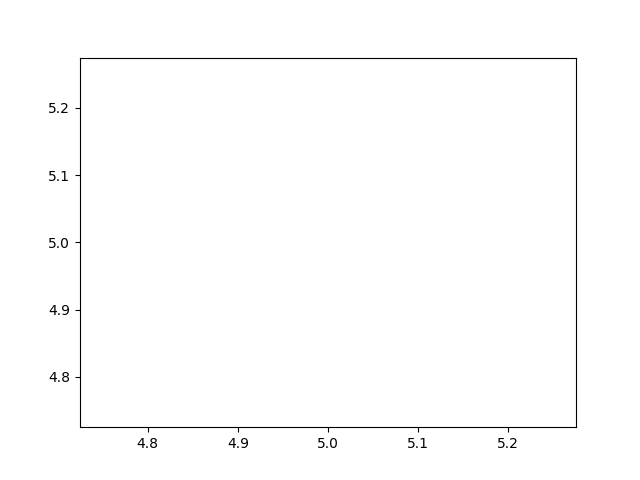

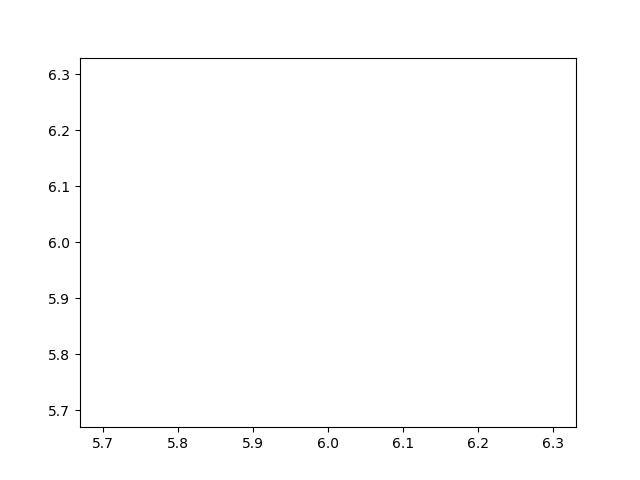

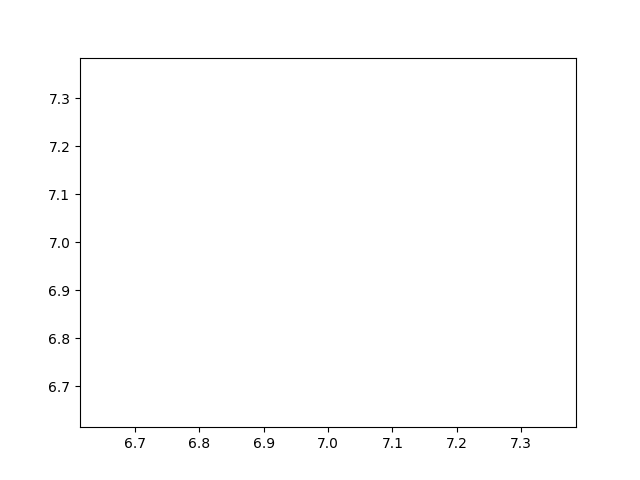

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done   2 out of   8 | elapsed:    0.6s remaining:    1.7s
[Parallel(n_jobs=4)]: Done   3 out of   8 | elapsed:    0.7s remaining:    1.2s
[Parallel(n_jobs=4)]: Done   4 out of   8 | elapsed:    0.9s remaining:    0.9s
[Parallel(n_jobs=4)]: Done   5 out of   8 | elapsed:    1.1s remaining:    0.7s
[Parallel(n_jobs=4)]: Done   6 out of   8 | elapsed:    1.2s remaining:    0.4s
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    1.3s finished


[0, 1, 4, 9, 16, 25, 36, 49]

In [28]:
def f(x):
    fig,ax = plt.subplots()
    ax.plot([x],[x])
    basic.display_fig_inline(fig)
    return x**2

basic.joblib_parallel_map(4, 100, f, range(8))

In [29]:
# define data
training_proportion = 0.5
training_sampler = functools.partial(data.doubly_robust_paper_pca_subsample, 0.3)
get_data_f = data.boston_housing
num_data = 500

In [30]:
#
get_data = functools.partial(data.get_data_helper, training_proportion, training_sampler, get_data_f, num_data)

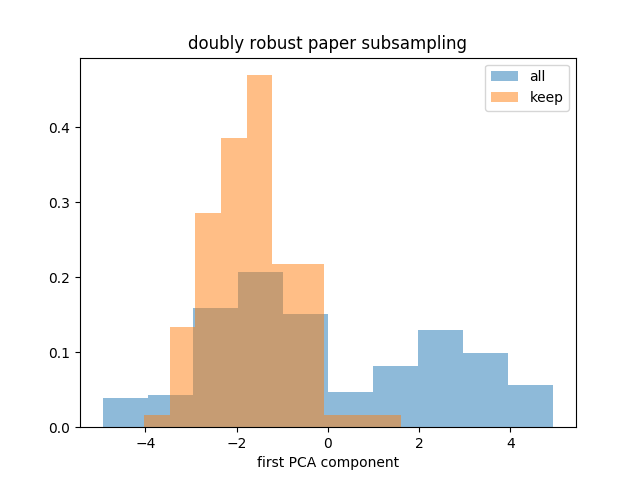

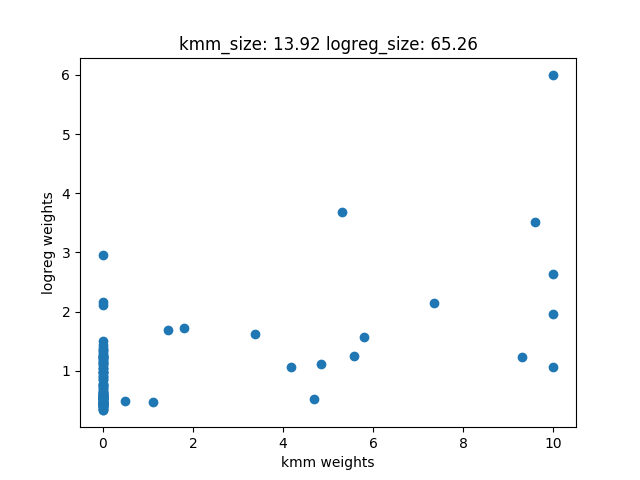

xs_train shape: (106, 13) xs_test_shape (106,)


In [31]:
# test get_data
xs_train, ys_train, xs_test, ys_test = get_data(1)
print 'xs_train shape:', xs_train.shape, 'xs_test_shape', xs_test.shape

In [32]:
# define fitter
num_tries = 1
plot_b_info = constructors.plot_b_info
def get_fitter(c_logreg, c_lsqr, sigma, max_ratio):
    return constructors.baseline_fitter(c_logreg, c_lsqr, sigma, max_ratio=max_ratio, plot_b_info=plot_b_info)

In [33]:
# define hyperparameter search space via an iterator
c_lsqrs = [10,]#100]#,150,500,1000]
c_logregs = [0.1,1.]
sigmas = [0.25,]#5.]#,5.]
max_ratios = [2.,5.]
make_tuple = lambda key, vals: [(key,val) for val in vals]
care_hyperparam_tuples = itertools.product(
    )
nocare_hyperparam_tuples = itertools.product(
    make_tuple('c_lsqr',c_lsqrs), 
    make_tuple('c_logreg',c_logregs), 
    make_tuple('sigma',sigmas), 
    make_tuple('max_ratio',max_ratios)
    )

In [34]:
#
#mapper = map
mapper = functools.partial(basic.joblib_parallel_map, 1, 100)

In [35]:
#
num_iterations = 1

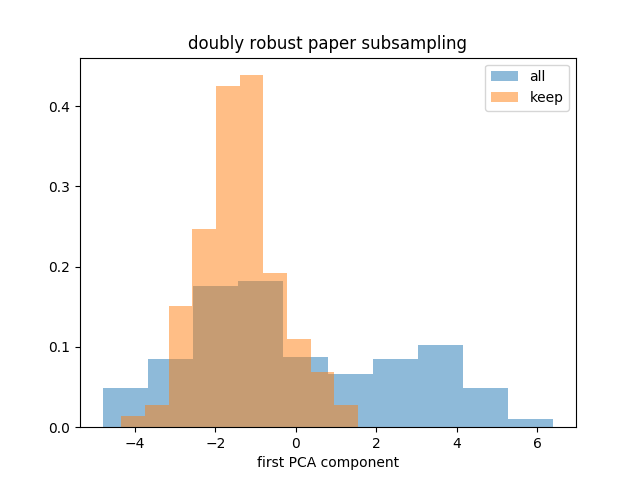

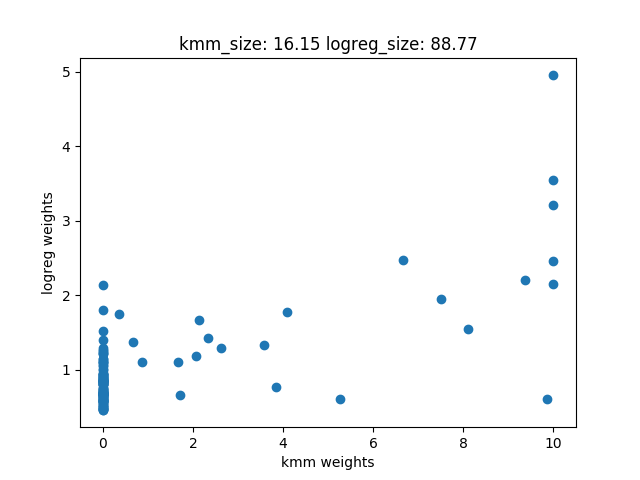

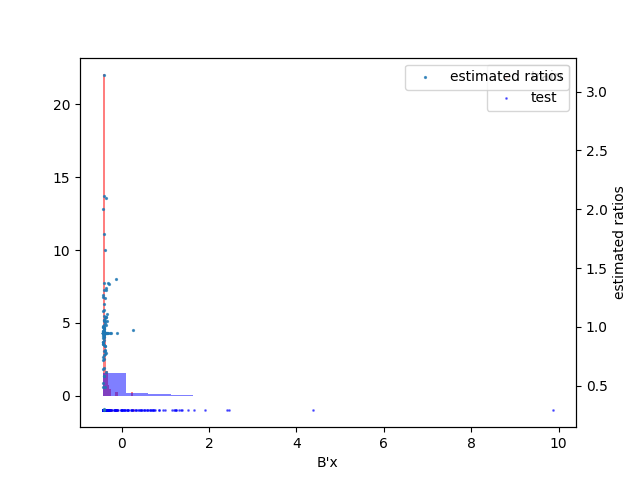

b_norm: 1.0


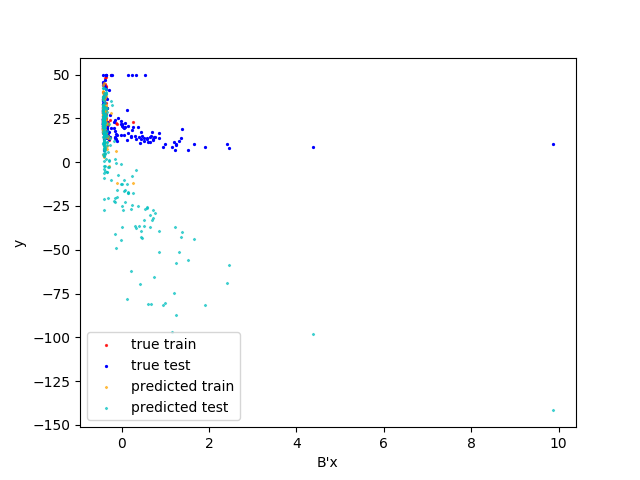

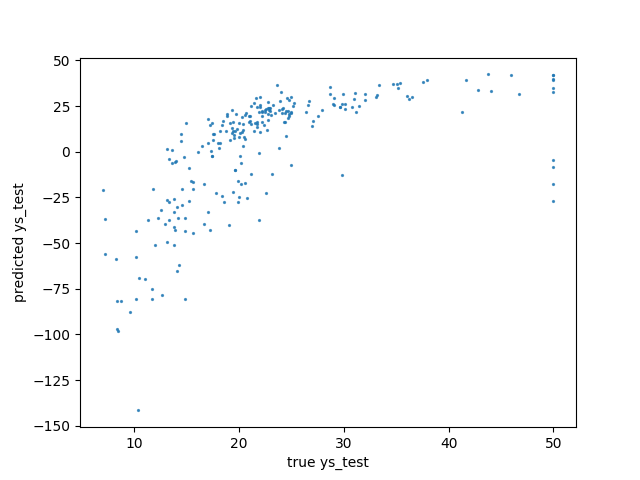

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.9s remaining:    0.0s


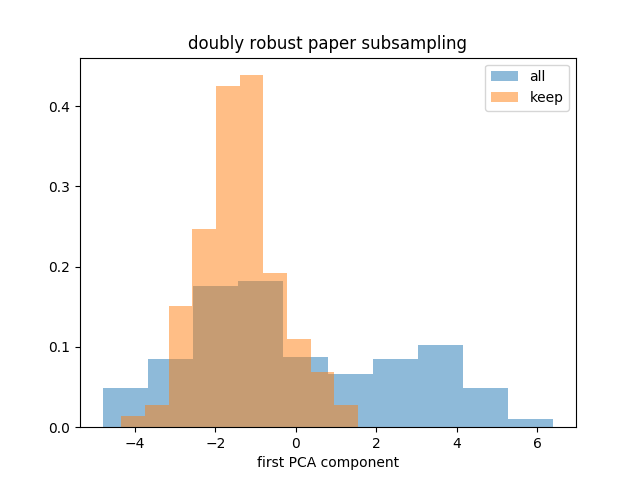

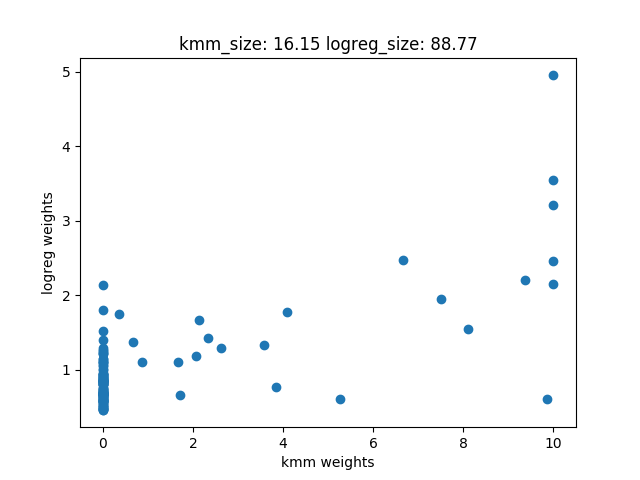

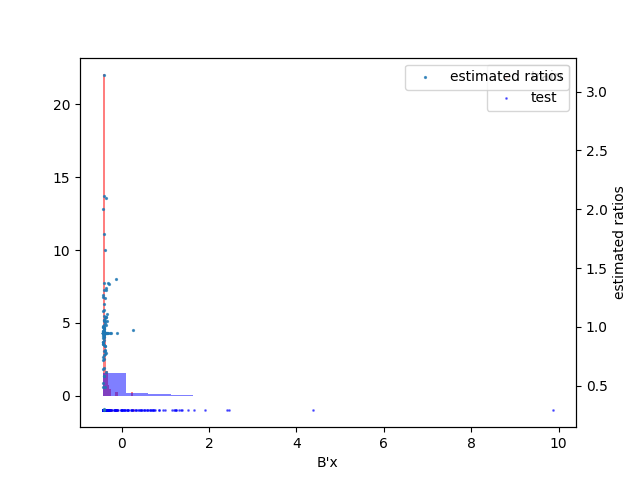

b_norm: 1.0


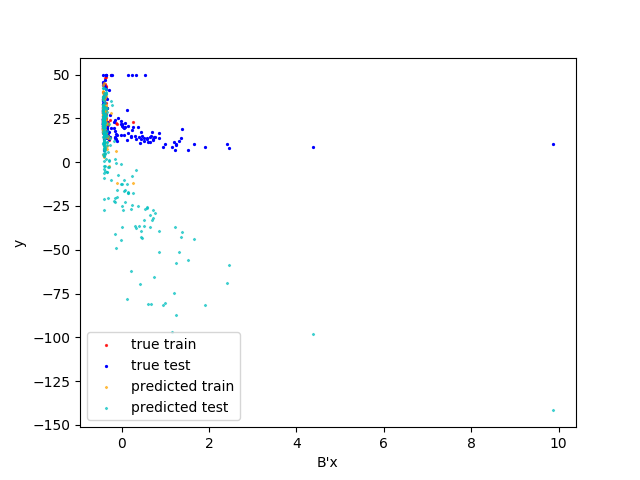

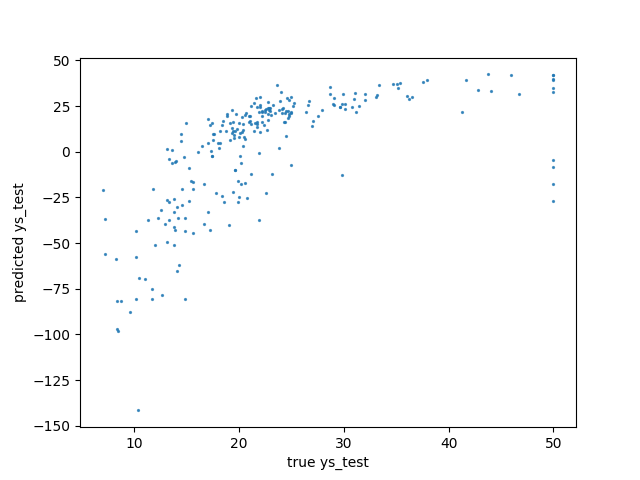

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.7s remaining:    0.0s


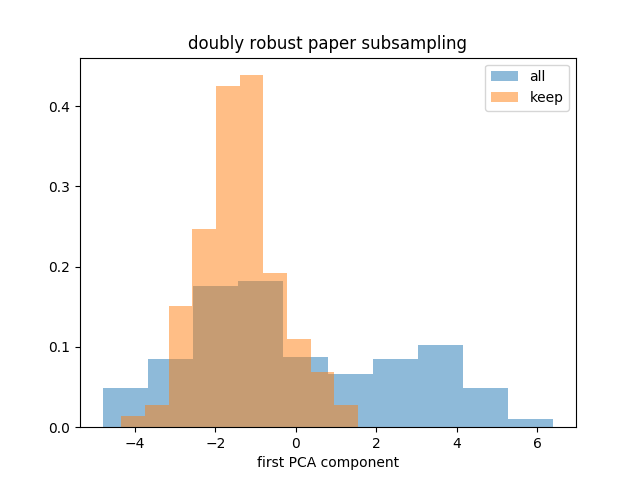

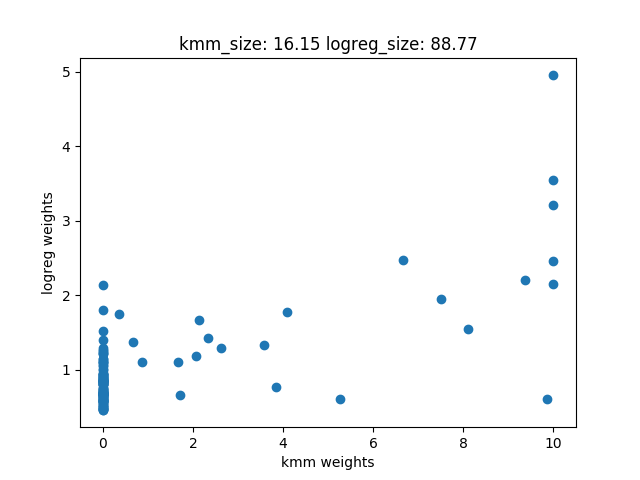

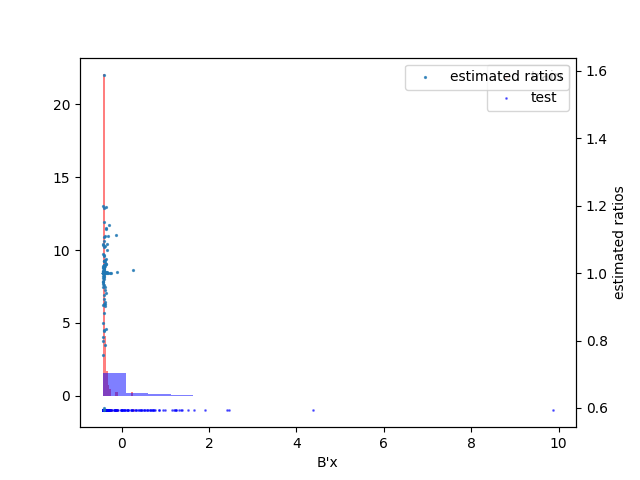

b_norm: 1.0


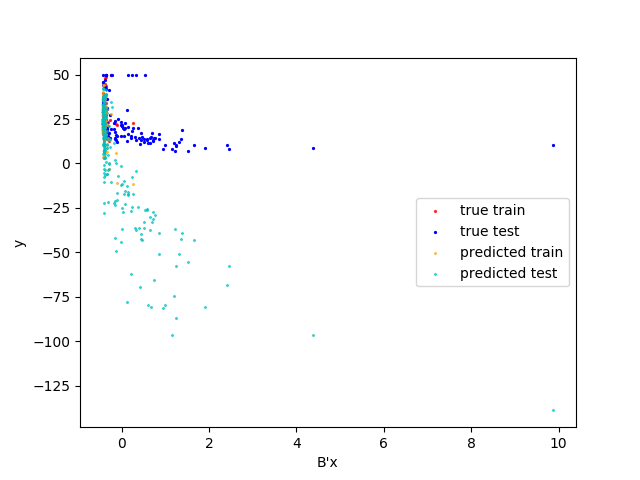

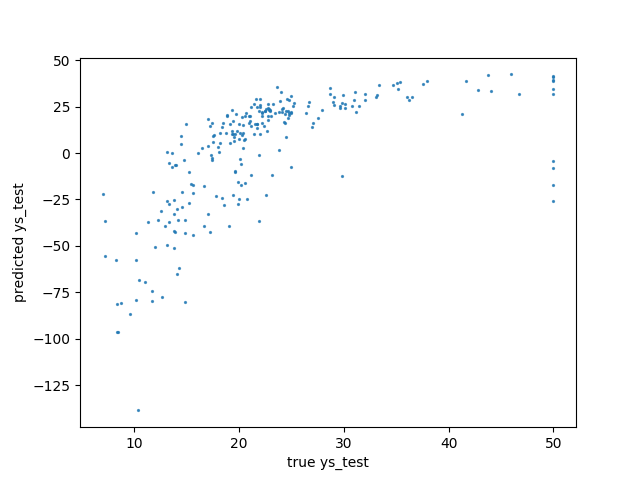

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   18.0s remaining:    0.0s


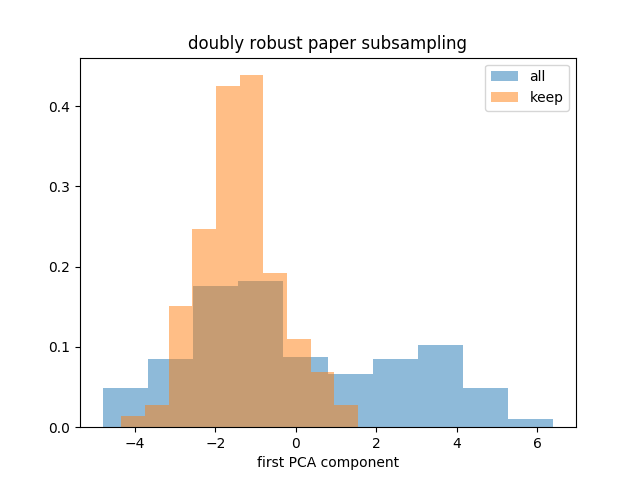

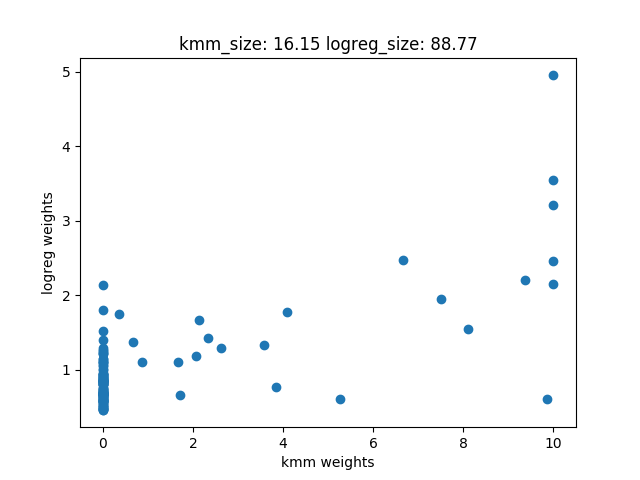

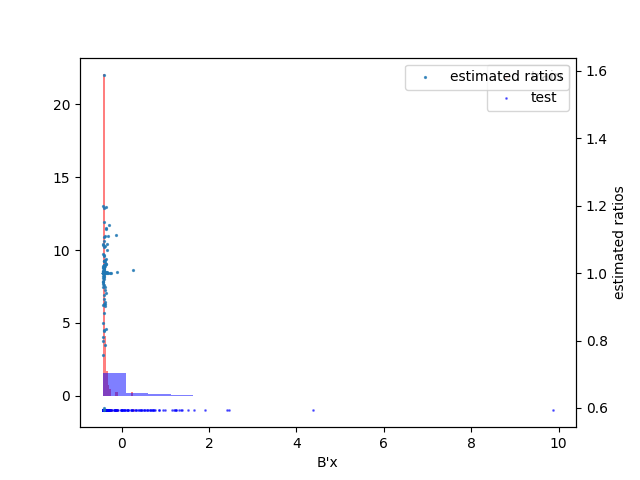

b_norm: 1.0


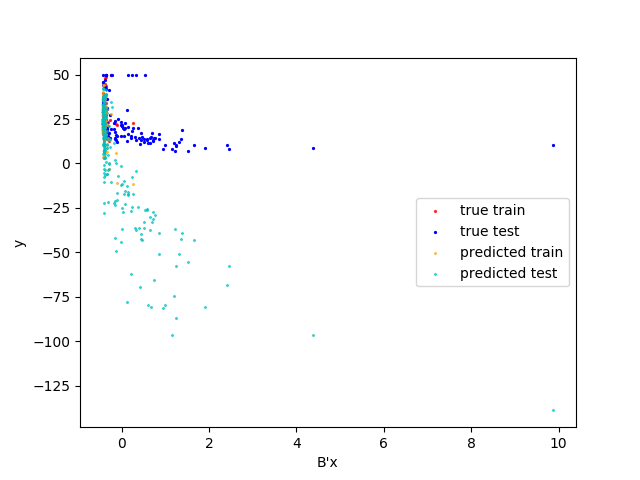

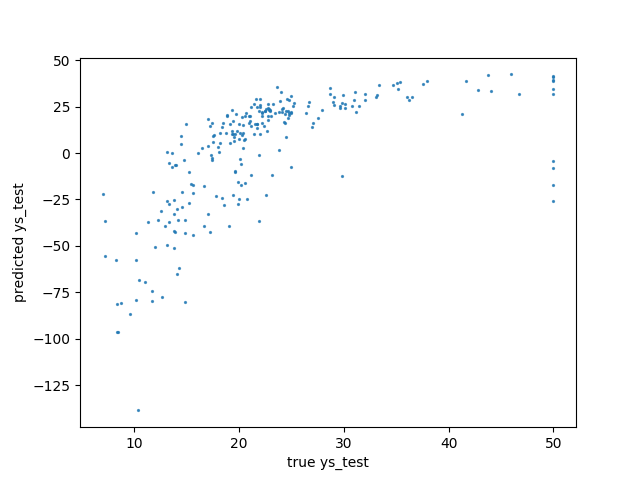

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   24.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   24.0s finished


(c_lsqr, 10) 
 
 
 
 (c_logreg, 0.1) 
 (c_logreg, 1.0) 
 
 
 
 (sigma, 0.25) 
 (sigma, 0.25) 
 
 
 
 (max_ratio, 2.0) 
 (max_ratio, 5.0) 
 (max_ratio, 2.0) 
 (max_ratio, 5.0) 
 
 
 
 
 mean_loss 
 292129 
 292129 
 290044.1 
 290044.1 
 
 
 std_loss 
 0 
 0 
 0 
 0 
 
 
 test_losses 
 [292128.955098] 
 [292128.955098] 
 [290044.142241] 
 [290044.142241]

         3903705 function calls (3837233 primitive calls) in 23.971 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     1196    8.955    0.007   13.572    0.011 utils.py:19(get_gaussian_K)
    31049    3.457    0.000    3.457    0.000 {method 'reduce' of 'numpy.ufunc' objects}
       40    2.151    0.054    2.152    0.054 {matplotlib._png.write_png}
60206/55502    1.647    0.000    5.637    0.000 core.py:121(__call__)
     1176    1.391    0.001   15.387    0.013 fxns.py:341(_val)
    30306    0.862    0.000    0.862    0.000 {numpy.core.multiarray.dot}
       12    0.363    0.030   16.958    1.413 optimize.py:874(_minimize_bfgs)
    90752    0.155    0.000    0.155    0.000 {numpy.core.multiarray.array}
     1752    0.136    0.000    0.136    0.000 {method 'set_text' of 'matplotlib.ft2font.FT2Font' objects}
   170348    0.129    0.000    0.129    0.000 __init__.py:934(__getitem__)
     1592    0.120    0.000    0.277    0

In [36]:
# 
basic.do_cprofile()(run.run)(get_data, get_fitter, care_hyperparam_tuples, nocare_hyperparam_tuples, num_iterations, mapper)